# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [ ]:
Observations: The first observation I noticed was even though it was slightly more male mice in the study it was still very even with the ratio of male and female. Secondly, Infubinol had more tumor volume than the rest of the Drug Regimen's. Lastly, as the days progressed, Capomulin tumor volume decreased.

In [478]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import scipy.stats
from sklearn.linear_model import LinearRegression

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
display(combined_data.head())


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [479]:
# Checking the number of mice.
num_mice = combined_data['Mouse ID'].nunique()
print(num_mice)

249


In [482]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
display(duplicate_mice)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [484]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()

In [486]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Check for duplicate mice by Mouse ID and Timepoint
duplicate_mouse_ids = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()
cleaned_data = combined_data[~combined_data['Mouse ID'].isin(duplicate_mouse_ids)]
cleaned_data = combined_data.drop_duplicates(subset=['Mouse ID',], keep='first')

# Display the number of mice in the cleaned data
num_cleaned_mice = cleaned_data['Mouse ID'].nunique()
# Display the cleaned DataFrame in a table format
print("Cleaned Data Preview:")
display(cleaned_data.head())

Cleaned Data Preview:


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25


In [488]:
# Checking the number of mice in the clean DataFrame.
num_cleaned_mice = cleaned_data['Mouse ID'].nunique()
print(num_cleaned_mice)

249


## Summary Statistics

In [491]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stats.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
display(summary_stats)

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [493]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
display(summary_stats)

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

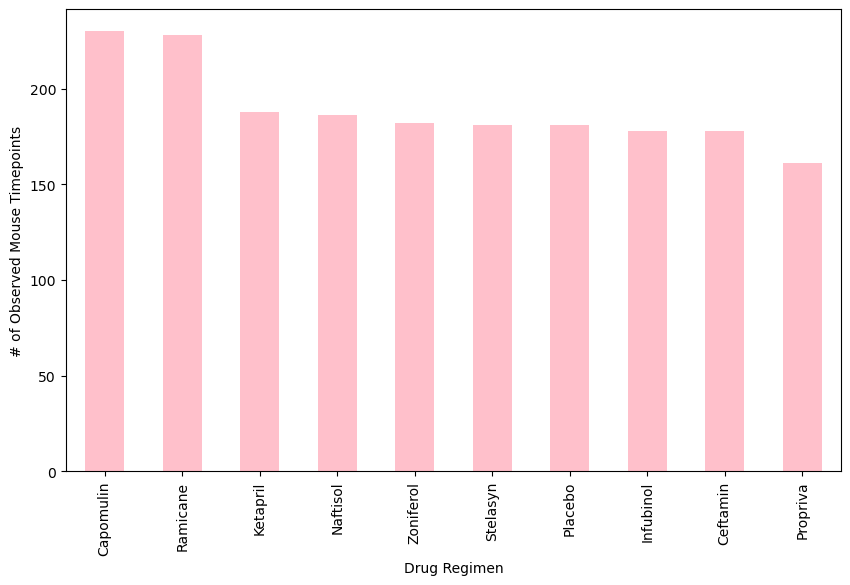

In [496]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_counts = combined_data['Drug Regimen'].value_counts()

# Creating a bar plot
drug_counts.plot(kind='bar', figsize=(10, 6), color='pink')

# Adding labels
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Displaying the plot
plt.show()

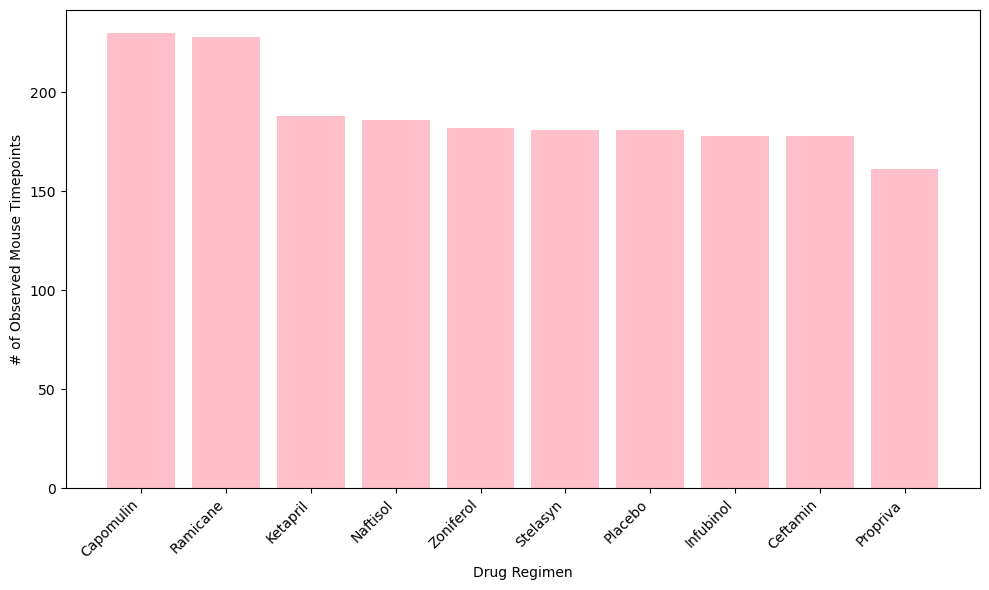

In [498]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_counts = combined_data['Drug Regimen'].value_counts()

# Extracting drug names and corresponding counts
drug_names = drug_counts.index
counts = drug_counts.values

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(drug_names, counts, color='pink')

# Adding labels
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=45, ha='right')

# Displaying the plot
plt.tight_layout()
plt.show()

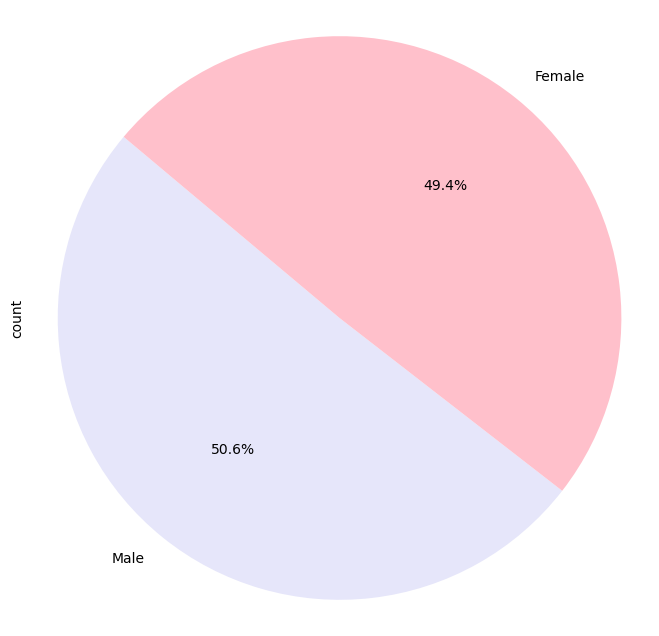

In [500]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = combined_data['Sex'].value_counts()

# Creating a pie plot
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lavender', 'pink'], startangle=140, figsize=(8, 8))

# Displaying the plot
plt.axis('equal')
plt.show()

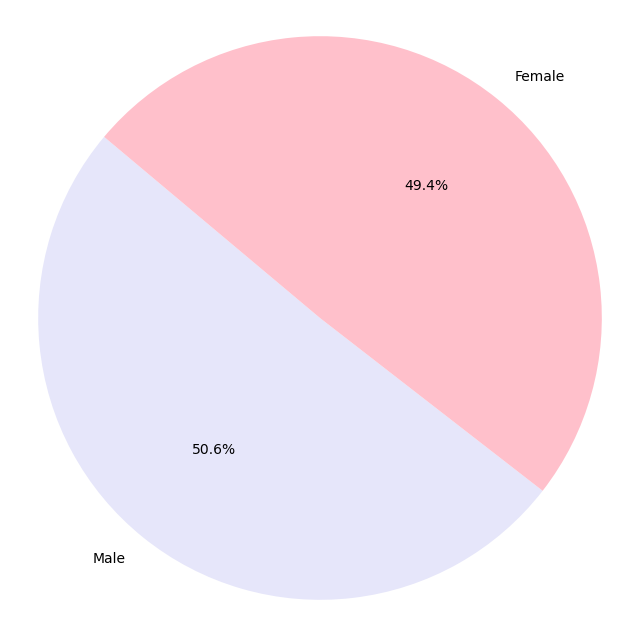

In [502]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts = combined_data['Sex'].value_counts()

# Extracting labels and counts
labels = gender_counts.index
sizes = gender_counts.values

# Creating the pie plot
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['lavender', 'pink'], startangle=140)

# Displaying the plot
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [505]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_combined_data = combined_data[combined_data['Drug Regimen'].isin(selected_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = filtered_combined_data.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(max_timepoints, combined_data, on=['Mouse ID', 'Timepoint'], how='left')
# Start by getting the last (greatest) timepoint for each mouse
display(merged_df[['Mouse ID', 'Timepoint', 'Drug Regimen', 'Tumor Volume (mm3)']])

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
0,a203,45,Infubinol,67.973419
1,a251,45,Infubinol,65.525743
2,a275,45,Ceftamin,62.999356
3,a411,45,Ramicane,38.407618
4,a444,45,Ramicane,43.047543
...,...,...,...,...
95,y769,45,Ceftamin,68.594745
96,y793,45,Capomulin,31.896238
97,y865,45,Ceftamin,64.729837
98,z578,45,Ramicane,30.638696


In [507]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    Study_results_df = combined_data[combined_data['Drug Regimen'] == treatment]
    
    
# Locate the rows which contain mice on each drug and get the tumor volumes
final_tumor_volume = Study_results_df.groupby('Mouse ID')['Tumor Volume (mm3)'].last()
    
# add subset 
tumor_vol_data.append(final_tumor_volume)
    
# Determine outliers using upper and lower bounds
quartiles = final_tumor_volume.quantile([0.25,0.5,0.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]
iqr = upper_quartile - lower_quartile
    
# Determine the lower and upper bounds
lower_bound = lower_quartile - (1.5 * iqr)
upper_bound = upper_quartile + (1.5 * iqr)
    
# Outlier detection
outliers = final_tumor_volume[(final_tumor_volume < lower_bound) | (final_tumor_volume > upper_bound)]

# Print the results
print(f"Capomulin's potential outliers:{final_tumor_volume[(final_tumor_volume < lower_bound) | (final_tumor_volume > upper_bound)]}")
print(f"Ramicane''s potential outliers:{final_tumor_volume[(final_tumor_volume < lower_bound) | (final_tumor_volume > upper_bound)]}")
print(f"Infubinol's potential outliers:{final_tumor_volume[(final_tumor_volume < lower_bound) | (final_tumor_volume > upper_bound)]}")
print(f"Ceftamin's potential outliers:{final_tumor_volume[(final_tumor_volume < lower_bound) | (final_tumor_volume > upper_bound)]}")

Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane''s potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


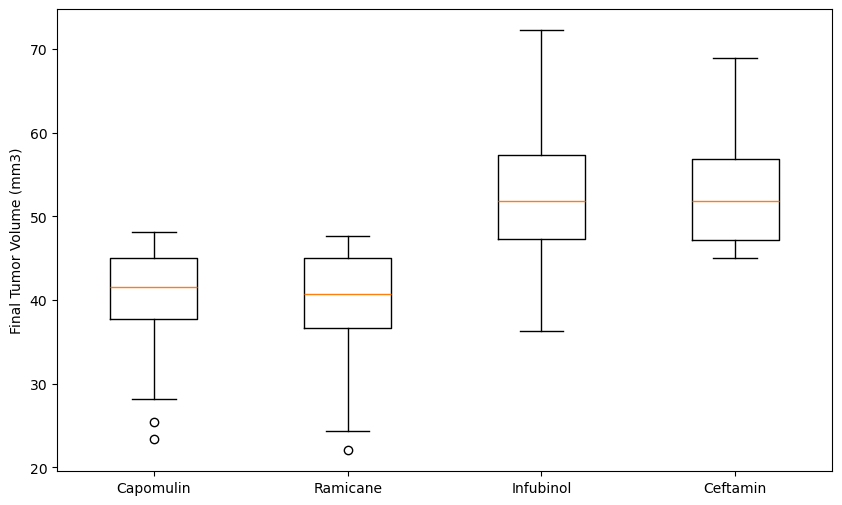

In [509]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_vol_data = [combined_data[combined_data['Drug Regimen'] == treatment]['Tumor Volume (mm3)'] for treatment in treatments]

# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, labels=treatments)

# Adding labels 
plt.ylabel('Final Tumor Volume (mm3)')

# Displaying the plot
plt.show()

## Line and Scatter Plots

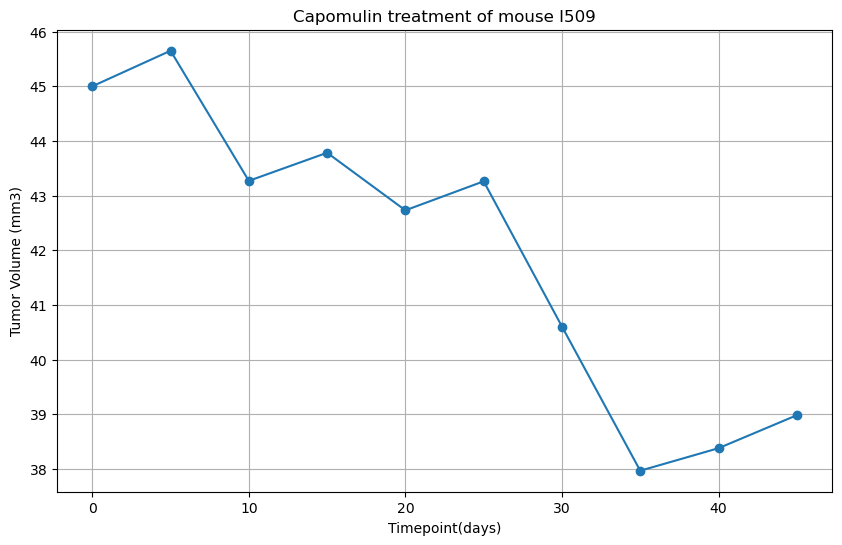

In [512]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = combined_data[combined_data['Drug Regimen'] == 'Capomulin']

# Choose a single mouse ID from the filtered DataFrame
mouse_id = capomulin_data['Mouse ID'].iloc[0]

# Filter the DataFrame to include only data for the selected mouse
single_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]

# Plot tumor volume vs. time point
plt.figure(figsize=(10, 6))
plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'], marker='o', linestyle='-')

# Adding labels and title
plt.title('Capomulin treatment of mouse I509')
plt.xlabel('Timepoint(days)')
plt.ylabel('Tumor Volume (mm3)')

# Displaying the plot
plt.grid(True)
plt.show()

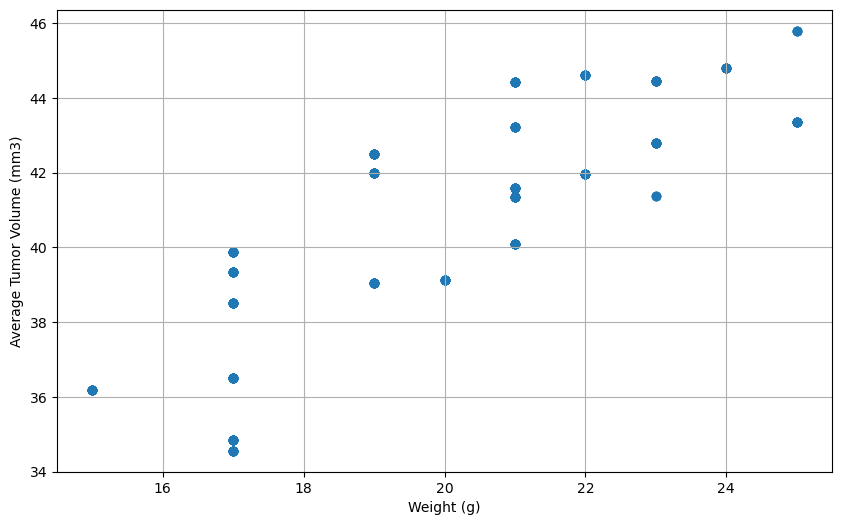

In [514]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_avg_tumor_volume = combined_data[combined_data['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume data with the mouse weight data
capomulin_avg_tumor_volume_df = pd.DataFrame(capomulin_avg_tumor_volume).reset_index()
capomulin_weight_avg_tumor = pd.merge(capomulin_avg_tumor_volume_df, combined_data[['Mouse ID', 'Weight (g)']], on='Mouse ID')

# Plot mouse weight vs. average tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_weight_avg_tumor['Weight (g)'], capomulin_weight_avg_tumor['Tumor Volume (mm3)'], marker='o')

# Adding labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Displaying the plot
plt.grid(True)
plt.show()

## Correlation and Regression

Correlation Coefficient: 0.8343958614425963
Correlation Coefficient: 0.8343958614425963
Linear Regression Model: y = 0.96x + 21.49


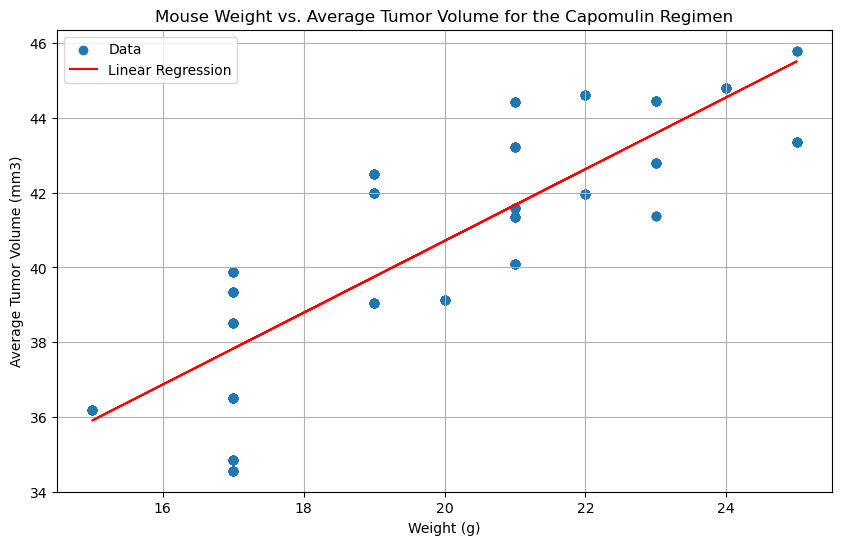

In [517]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_avg_tumor_volume = combined_data[combined_data['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume data with the mouse weight data
capomulin_avg_tumor_volume_df = pd.DataFrame(capomulin_avg_tumor_volume).reset_index()
capomulin_weight_avg_tumor = pd.merge(capomulin_avg_tumor_volume_df, combined_data[['Mouse ID', 'Weight (g)']], on='Mouse ID')

# Calculate the correlation coefficient
correlation_coefficient, _ = scipy.stats.pearsonr(capomulin_weight_avg_tumor['Weight (g)'], capomulin_weight_avg_tumor['Tumor Volume (mm3)'])
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"Correlation Coefficient: {correlation_coefficient}")

# Perform linear regression
X = capomulin_weight_avg_tumor[['Weight (g)']]
y = capomulin_weight_avg_tumor['Tumor Volume (mm3)']
regression_model = LinearRegression().fit(X, y)

# Print the linear regression model
slope = regression_model.coef_[0]
intercept = regression_model.intercept_
print(f"Linear Regression Model: y = {slope:.2f}x + {intercept:.2f}")

# Plot the scatter plot and regression line
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_weight_avg_tumor['Weight (g)'], capomulin_weight_avg_tumor['Tumor Volume (mm3)'], label='Data')
plt.plot(capomulin_weight_avg_tumor['Weight (g)'], regression_model.predict(X), color='red', label='Linear Regression')
plt.title('Mouse Weight vs. Average Tumor Volume for the Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()
plt.grid(True)
plt.show()